In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import cp_comparitor


In [3]:
def my_function(**kwargs):
    #for key, value in kwargs.items():
    #print(kwargs.items())
    #key, value = kwargs.items()
    operator = kwargs.get('name')
    #dict_items['name']
    #name
    #ame = kwargs.name
    print(operator)
#rint(name)        
# Example usage
my_function(name="John", age=30, city="New York")

John


In [14]:
vec1 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,9,2,2,3,3,4,3,3,7,2,2,2,1,8,1,1,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0])
vec2 = np.array([0,1,1,8,1,2,2,3,3,4,3,3,7,3,2,2,2,1,16,1,1,1,0,0,0,0,0,0,0,0,0,0,0])

vect1 = np.array([0,0,0,0,1,2,3,4,3,2,1,0])
vect2 = np.array([0,1,2,3,4,3,2,1,0,0,0,0])
def spearman_offset(comparitee_vector, comparitor_vector, **kwargs):
    _window = kwargs.get('window')
    stat = []
    pvalue = []
    tee = comparitee_vector
    tor = comparitor_vector

    if len(tor)<len(tee[:_window]):
        print("Comparitor is shorter than comparitee, this won't do, try a shorter sequence") 
    else:
        for i in range(len(tor)-len(tee)):
            SigRes = (stats.spearmanr(tor[i:i+_window],tee[:_window]))
            stat.append(SigRes.statistic)
            pvalue.append(SigRes.pvalue)
        statAray = np.array(stat)
        statAray = np.nan_to_num(statAray, nan=0.0)
        
        pvalueAray = np.array(pvalue)
        pvalueAray = np.nan_to_num(pvalueAray, nan=1)
        print(statAray,pvalueAray)
    #return np.mean([statAray.argmax(), pvalueAray.argmin()])
    return pvalueAray.argmin(), statAray.argmax()

speof = spearman_offset(vec2*-10.44, vec1, window=10)

[ 0.          0.          0.         -0.41377403 -0.48766225 -0.58045433
 -0.5758028  -0.57436813 -0.50830627 -0.6666969  -0.59621748 -0.3836478
 -0.90480294 -0.32377782 -0.19491305  0.1032602  -0.08891012  0.0098789
  0.50984722  0.18354798] [1.00000000e+00 1.00000000e+00 1.00000000e+00 2.34565721e-01
 1.52780877e-01 7.85205455e-02 8.15232619e-02 8.24641084e-02
 1.33574927e-01 3.52538635e-02 6.88801850e-02 2.73766807e-01
 3.19871808e-04 3.61431171e-01 5.89460159e-01 7.76511452e-01
 8.07039283e-01 9.78392010e-01 1.32204323e-01 6.11744413e-01]


In [17]:
#import numpy as np
#from welly import Well

def replace_outliers_with_local_average(curve, percent, window_size):
    # Load the well log data
    #w = 

    # Get the curve data
    

    # Calculate the lower and upper percentile values
    low_value = np.percentile(curve, percent)
    high_value = np.percentile(curve, 100 - percent)

    # Identify outlier data points
    outliers = np.logical_or(curve < low_value, curve > high_value)

    # Replace outliers with local average
    curve[outliers] = np.convolve(curve, np.ones(window_size)/window_size, mode='same')[outliers]

    # Update the well log curve with the replaced values
    w = curve

    return w

(12, 18)

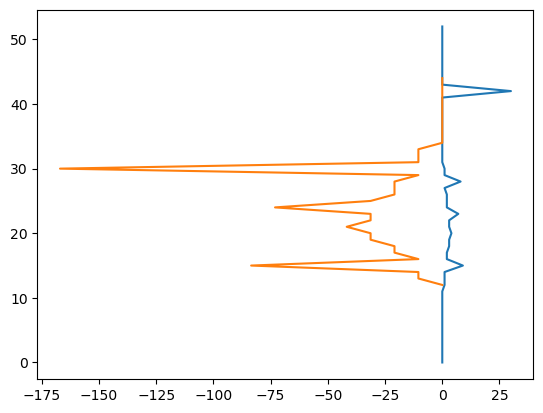

In [16]:
plt.plot(vec1, np.arange(len(vec1)) )

plt.plot(vec2*-10.44, np.arange(len(vec2))+speof[0])

speof

In [4]:
#cp_comparitor.Cosine(vec1[11:18], vec2[:7])
vec3 = [1,2,3,5,8,13,21,34]
vectee = np.vstack((vec3, vec2[:8]))
vector = np.vstack((vec3, vec2[:8]))
test = cp_comparitor.cpCompConstructor(vector)
corr = cp_comparitor.cpCorrelation(vectee, vector, operator='cosine', thresh=0.9999)
#test

*****MATCH1.0
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH1.0
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH1.0
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH1.0
*****MATCH1.0000000000000002
*****MATCH1.0
*****MATCH1.0
*****MATCH1.0
*****MATCH1.0000000000000002


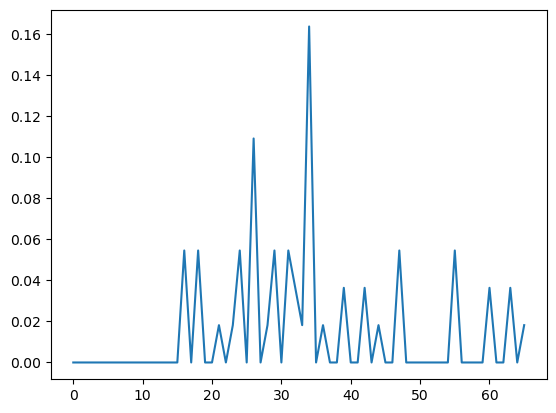

In [5]:
plt.plot(corr)

In [6]:
# import fastdtw
# import scipy.spatial.distance as sd

# def my_fastdtw(x, y):
#     return fastdtw.fastdtw(x,y)[0]

# distance_matrix = sd.pdist(y,my_fastdtw)

np.arange(4).reshape(2,2)

array([[0, 1],
       [2, 3]])

In [9]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw
#_log_choice = 'Roll_Avg_NPHI'
#f1B_DTW = data_f1B['DEPTH',_log_choice][_log_extent_min[1]:_log_extent_max[1]].to_numpy()
#f11A_DTW = data_f11A[_log_choice][_log_extent_min[3]:_log_extent_max[3]].to_xarray()
#f1A_DTW = data_f1A[_log_choice][_log_extent_min[0]:_log_extent_max[0]].to_xarray()
#x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
#y = np.array([[2,2], [3,3], [4,4]])


#y = np.column_stack((data_f1B[_log_extent_min[1]:_log_extent_max[1]].index, data_f1B[_log_choice][_log_extent_min[1]:_log_extent_max[1]]))
#x = np.column_stack((data_f11A[_log_extent_min[3]:_log_extent_max[3]].index, data_f11A[_log_choice][_log_extent_min[3]:_log_extent_max[3]]))
# distance, path = fastdtw(x, y, dist=euclidean)
# print(distance)
# plt.plot(path)
#


def dtw_offset(comparitee_vector, comparitor_vector, **kwargs):
    _window = kwargs.get('window')
    distance = []
    path = []
    tee = comparitee_vector
    tor = comparitor_vector
    iter = len(tor)-len(tee)
    if len(tor)<len(tee[:_window]):
        print("Comparitor is shorter than comparitee, this won't do, try a shorter sequence") 
    else:
        for i in range(iter):
            _distance, _path = fastdtw(tor[i:i+_window],tee[:_window], dist=euclidean)
            distance.append(_distance)
            path.append(_path)
        distanceAray = np.array(distance)
        #statAray = np.nan_to_num(statAray, nan=0.0)
        
        #pathAray = np.array(path)#.reshape(_window,iter)
        #pvalueAray = np.nan_to_num(pvalueAray, nan=1)
        #print('statArgmax= ' + str(statAray.argmax()) + ' val ' + str(statAray[statAray.argmax()]))
        #print('pvalArgmin= ' + str(pvalueAray.argmin()) + ' val ' + str(pvalueAray[pvalueAray.argmin()]))
        #print
    return distanceAray, path

In [10]:
y = np.column_stack((np.arange(len(vec2)),vec2))
x = np.column_stack((np.arange(len(vec1)),vec1))
# distance, path = fastdtw(x, y, dist=euclidean)

dist, path = dtw_offset(y[:10],x, window=10)

#print(dist, path)
#patharay = np.array(path[0])
dist, path



(array([ 20.        ,  23.32471525,  27.93026652,  33.35767221,
         40.57787227,  48.92994733,  58.62640129,  69.26029068,
         80.39684843,  90.38769597, 100.24937811, 110.        ,
        120.20797289, 130.26883367, 140.49828433, 150.76361889,
        160.90176075, 171.11186954, 181.16044273, 191.20303536,
        200.97123744, 210.99606776, 221.06290819, 230.99539007,
        241.03703191, 251.0357845 , 260.99624975, 270.9781242 ,
        280.96126804, 290.9455532 , 300.89754412, 310.86874101,
        320.8417248 , 330.81633457, 340.79242811, 350.7698793 ,
        360.7485759 , 370.72841769, 380.70931488, 390.69118684,
        400.67396093, 410.65757153]),
 [[(0, 0),
   (1, 1),
   (2, 2),
   (3, 3),
   (4, 4),
   (5, 5),
   (6, 6),
   (7, 7),
   (8, 8),
   (9, 9)],
  [(0, 0),
   (1, 1),
   (2, 2),
   (3, 3),
   (4, 4),
   (5, 5),
   (6, 6),
   (7, 7),
   (8, 8),
   (9, 9)],
  [(0, 0),
   (0, 1),
   (1, 2),
   (2, 3),
   (3, 4),
   (4, 5),
   (5, 6),
   (6, 7),
   (7, 8),
 

In [11]:
vect1 = np.array([0,0,0,0,1,2,3,4,3,2,1,0])
vect2 = np.array([0,1,2,3,4,3,2,1,0,0,0,0])

yY = np.column_stack((np.arange(len(vect2[:5])),vect2[:5]))
xX = np.column_stack((np.arange(len(vect1[3:9])),vect1[3:9]))

#_distance, _path = fastdtw(yY,xX, dist=euclidean)

#_distance, _path

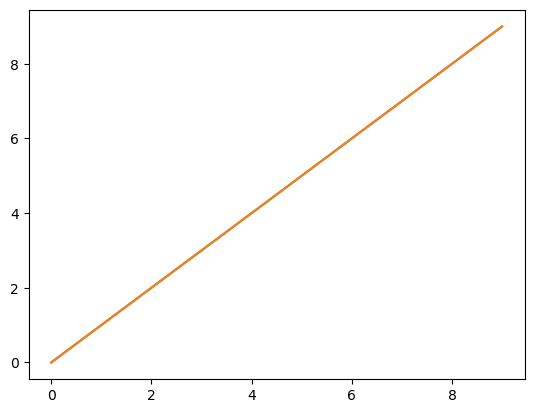

In [16]:
#plt.plot(dist)
plt.plot(path[0],path[1])